In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np
from pandas import merge
import re
import matplotlib.patches as mpatches


In [2]:
df = pd.read_pickle('df_num')
drugbank_df = pd.read_pickle('db_df')

In [57]:
drugbank_df.to_csv('drugbank.csv.zip',sep=';',index=False,encoding='utf-8')

In [3]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

Kmeans aplicado diretamente com as 2 primeiras colunas do DF (peso molecular e logP)

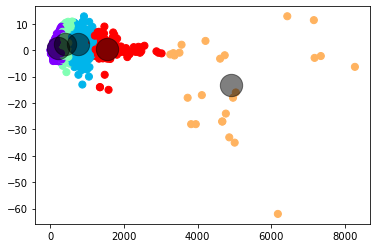

In [4]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

aplicação de filtro pra vizualizar 2 clusters

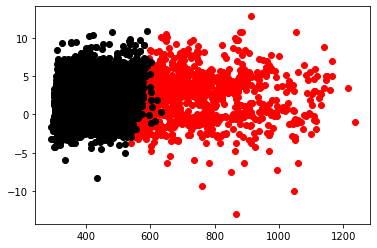

In [5]:
#filter rows of original data
filtered_label2 = df[y_pred == 1]
 
filtered_label8 = df[y_pred == 2]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

aplicaçao metodo elbow e aplicação do kmeans com o dado tratado no standardscaler com base visto em https://realpython.com/k-means-clustering-python/

In [6]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Aplicação do PCA e clusterização com base no geron

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
X2D = pca.fit_transform(df)


In [32]:
pca.explained_variance_ratio_[0:2].cumsum()


array([0.96821661, 0.99493265])

In [35]:
df2 = pd.DataFrame(X2D)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,7.285307e-19
1,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-3.062088e-17
2,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,3.280054e-15
3,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20
4,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20
14311,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20
14312,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20
14313,-0.00009,0.000054,-0.000143,0.001175,0.000402,-0.000377,0.000641,-0.001831,0.001641,-0.002743,0.002277,0.010294,0.098235,0.047452,-5.313050e-20


In [38]:
dfteste = pd.concat([df,df2], axis=1)



In [43]:
corrmatriz = dfteste.corr()

In [55]:
corrmatriz['molecular_weight'].sort_values(ascending=False)

molecular_weight           1.000000e+00
0                          9.982951e-01
refractivity               9.611185e-01
polarizability             9.396628e-01
polar_surface_area         8.785471e-01
hydrogen_acceptor_count    8.662803e-01
rotable_bond_count         8.517024e-01
hydrogen_donor_count       7.790521e-01
number_of_rings            6.814746e-01
cluster                    5.552962e-01
pKa_Basic                  1.007616e-01
2                          1.892872e-02
3                          8.394622e-05
6                          3.884327e-05
7                          2.085768e-05
9                          7.763162e-06
12                         2.368372e-06
13                         2.000268e-07
14                         4.478789e-17
10                        -5.163534e-06
11                        -6.756808e-06
8                         -2.639890e-05
5                         -7.160118e-05
4                         -2.167650e-04
logP                      -5.356408e-02


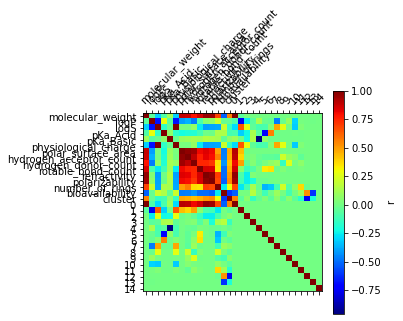

In [44]:
columns = list(corrmatriz.columns)

cm = plt.get_cmap('jet') # viridis,inferno,plasma

g = plt.matshow(corrmatriz,cmap=cm)

cbar = plt.colorbar()
cbar.ax.set_ylabel('r')

ax = plt.gca() # get the current axes
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the tick labels and set their alignmentdadaadada
r = plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

<AxesSubplot:>

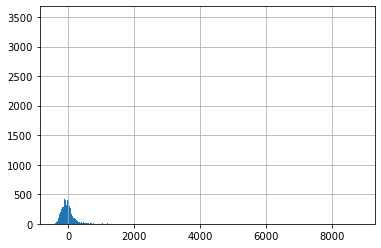

In [52]:
df2[0].hist(bins = 700)

In [9]:
principalDf1 = pd.DataFrame(data = X2D , columns = ['principal component 1', 'principal component 2'])

principalDf1['principal component 1']

0        6.510212e-18
1        8.529927e-13
2        8.529924e-13
3        8.529924e-13
4        8.529924e-13
             ...     
14310    8.529924e-13
14311    8.529924e-13
14312    8.529924e-13
14313    8.529924e-13
14314    8.529924e-13
Name: principal component 1, Length: 14315, dtype: float64

In [10]:
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X2D)
kmeans.cluster_centers_

array([[ 1.27425419e+01, -9.49167147e+00],
       [ 5.02861455e+03,  2.21319759e+02],
       [ 3.81248834e+02, -2.19353780e+01],
       [-1.82197005e+02,  2.20703376e+01],
       [ 1.26619320e+03, -1.96777025e+00]])

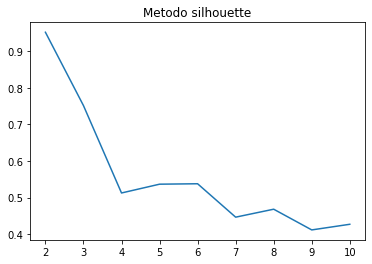

In [45]:
from sklearn.metrics import silhouette_score

aux = []

for i in range(2,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit_predict(X2D)
    score = silhouette_score(X2D, kmeans.labels_)
    aux.append(score)

plt.plot(range(2,11), aux)
plt.title('Metodo silhouette')


plt.show()

In [12]:
pca.explained_variance_ratio_


array([0.96821802, 0.02671609])

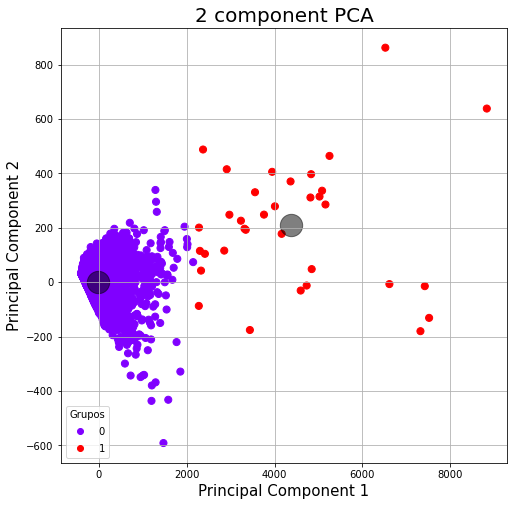

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)



k = 2
kmeans2 = KMeans(n_clusters=k)
y_pred2 = kmeans2.fit_predict(principalDf1)
kmeans2.cluster_centers_


scatter = plt.scatter(principalDf1.loc[:,'principal component 1'], principalDf1.loc[:,'principal component 2'], c=y_pred2, s=50, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=500, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Grupos")



ax.grid()

In [14]:
pca = PCA()
pca.fit(y_pred2)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
dfcluster = pd.DataFrame(y_pred2)

drugbank_df["cluster"] = dfcluster

df["cluster"] = dfcluster

In [16]:
grupo1 = df[df.cluster == 0]

grupo2 = df[df.cluster == 1]

grupo3 = df[df.cluster == 2]

In [17]:
grupo1

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
0,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
1,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
2,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
3,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
4,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14311,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14312,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14313,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0


In [18]:
grupo2

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
623,6179.3581,-62.00,-3.381529,11.27000,-4.000000,-3.381529,3038.93,191.0,116.0,149.0,1251.40,38.350913,38.0,0.0,1
1256,3949.4400,-28.00,-3.381529,9.44000,12.240000,-3.381529,1690.64,59.0,56.0,109.0,983.93,395.670000,8.0,0.0,1
1262,2933.4900,-0.95,-4.800000,3.03000,12.380000,-4.800000,1158.72,46.0,42.0,93.0,790.98,309.350000,9.0,0.0,1
4697,8272.3380,-6.30,-3.381529,0.95000,2.688221,-3.381529,3617.47,190.0,87.0,152.0,1931.71,735.410000,69.0,0.0,1
4725,3505.9260,-0.94,-4.400000,3.13000,12.680000,-4.400000,1593.12,63.0,60.0,82.0,930.43,355.050000,5.0,0.0,1
4734,4212.7800,3.53,-3.381529,2.81000,12.480000,-3.381529,1900.21,105.0,66.0,131.0,1172.81,441.470000,8.0,0.0,1
5020,5036.5637,-16.00,-3.381529,2.70000,2.688221,-3.381529,2064.83,71.0,68.0,170.0,1268.84,38.350913,12.0,0.0,1
5089,7346.1400,-2.20,-3.381529,0.06600,2.688221,-3.381529,2450.68,127.0,47.0,154.0,1591.03,653.990000,52.0,0.0,1
5119,7177.1100,-2.90,-3.381529,0.06600,2.688221,-3.381529,2340.43,122.0,45.0,156.0,1553.06,677.600000,46.0,0.0,1
5134,2880.3100,-0.42,-4.400000,2.92000,12.690000,-4.400000,1461.08,79.0,55.0,102.0,818.20,298.150000,3.0,0.0,1


In [19]:
grupo3

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
5,2180.2853,-0.76,-4.7,2.79,11.880000,-4.7,901.57,37.0,28.0,66.0,543.33,215.46,6.0,0.0,2
6,1209.3983,1.04,-4.6,9.49,11.920000,-4.6,429.04,16.0,16.0,32.0,327.24,126.80,6.0,0.0,2
13,1269.4105,0.30,-4.6,9.27,10.820000,-4.6,495.89,18.0,17.0,33.0,325.84,131.22,6.0,0.0,2
25,1811.2530,4.38,-5.7,11.56,2.688221,-5.7,519.89,16.0,20.0,50.0,492.33,194.73,8.0,0.0,2
33,1069.2200,-1.00,-4.0,9.50,11.770000,-4.0,435.41,15.0,14.0,19.0,279.78,104.78,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,1226.4110,0.29,-4.7,9.46,-3.300000,-4.7,366.42,17.0,13.0,18.0,330.98,130.91,7.0,0.0,2
14203,1205.3880,5.52,-5.0,3.63,10.460000,-5.0,281.00,18.0,7.0,11.0,330.61,126.49,10.0,0.0,2
14214,1689.2800,-1.20,-4.4,-0.48,10.280000,-4.4,609.65,26.0,20.0,30.0,426.36,165.18,7.0,0.0,2
14230,871.3390,8.37,-6.2,12.16,-1.000000,-6.2,177.81,9.0,7.0,43.0,246.50,111.73,1.0,0.0,2


In [20]:
def lipinski(grupo):
    lipinskado = grupo[(grupo['molecular_weight'] <= 500) & (grupo['logP'] <= 5) & (grupo['hydrogen_acceptor_count'] <= 10) & (grupo['hydrogen_donor_count'] <= 5)]
    return lipinskado

In [21]:
g1lip= lipinski(grupo1)
g2lip = lipinski(grupo2)
g3lip =lipinski(grupo3)


In [22]:
aceitoslipinski1= pd.concat([g1lip,g2lip,g3lip])

aceitoslipinski1.cluster.value_counts()

0    11619
Name: cluster, dtype: int64

In [23]:
aceitoslipinski1

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
0,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
1,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
2,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
3,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
4,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14311,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14312,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14313,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0


PCA e clusterização metodo 2

In [24]:
scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)

scaled_data


array([[ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01],
       ...,
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01],
       [ 3.04914108e-15,  2.18113863e-15,  1.77030648e-15, ...,
        -2.24735566e-16,  0.00000000e+00, -2.42016149e-01]])

In [25]:
pca = PCA(n_components = 2)


principal_components = pca.fit_transform(scaled_data)


principalDf = pd.DataFrame(data = principal_components , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-0.054745,-0.000166
1,-0.054745,-0.000166
2,-0.054745,-0.000166
3,-0.054745,-0.000166
4,-0.054745,-0.000166
...,...,...
14310,-0.054745,-0.000166
14311,-0.054745,-0.000166
14312,-0.054745,-0.000166
14313,-0.054745,-0.000166


In [26]:
pca = PCA()
pca.fit(df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

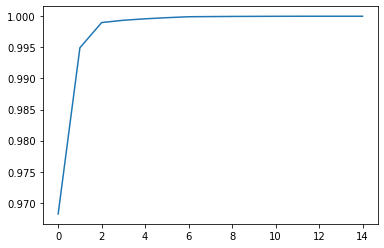

In [27]:
plt.plot(cumsum)

metodo elbow para descobrir o K ideal

1 148535.60350741088
2 101145.38622136398
3 70968.87921470043
4 42971.67472697029
5 34105.30989415936
6 29267.74288718047
7 25875.54056132136
8 21858.458959265336
9 19023.892580629643
10 16763.841789818027


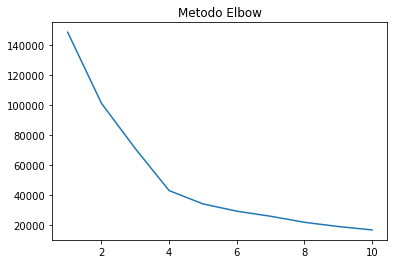

In [28]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit(principal_components )
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')

plt.show()

metodo silhouette

In [29]:
from sklearn.metrics import silhouette_score

aux = []

for i in range(3,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit_predict(principalDf)
    score = silhouette_score(principalDf, kmeans.labels_)
    aux.append(score)

plt.plot(range(3,11), aux)
plt.title('Metodo silhouette')


plt.show()

KeyboardInterrupt: 

In [ ]:
pca.explained_variance_ratio_

array([0.49636362, 0.22063008])

71,7% do dado pelo pca de 2 componentes

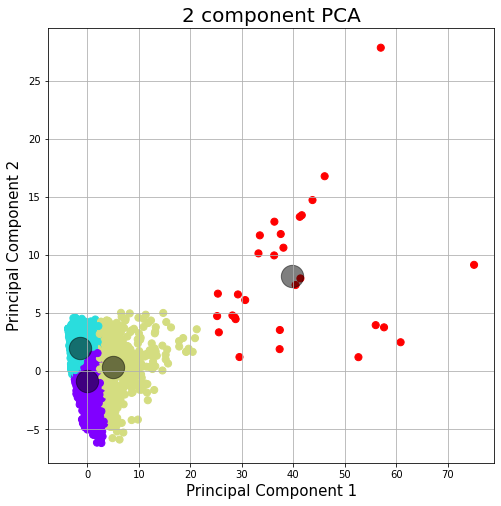

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


k = 4
kmeans2 = KMeans(n_clusters=k)
y_pred = kmeans2.fit_predict(principalDf)
kmeans2.cluster_centers_


plt.scatter(principalDf.loc[:,'principal component 1'], principalDf.loc[:,'principal component 2'], c=y_pred, s=50, cmap='rainbow')
centers2 = kmeans2.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=500, alpha=0.5)



ax.grid()

In [ ]:
dfcluster = pd.DataFrame(y_pred)

drugbank_df["cluster"] = dfcluster

df["cluster"] = dfcluster

In [ ]:
grupo1 = df[df.cluster == 0]

grupo2 = df[df.cluster == 1]

grupo3 = df[df.cluster == 2]

grupo4 = df[df.cluster == 3]

In [ ]:
def lipinski(grupo):
    lipinskado = grupo[(grupo['molecular_weight'] <= 500) & (grupo['logP'] <= 5) & (grupo['hydrogen_acceptor_count'] <= 10) & (grupo['hydrogen_donor_count'] <= 5)]
    return lipinskado
        
def notmedianhigh(grupo):
    notmedian = grupo[(grupo['molecular_weight'] == 385.041182) & (grupo['logP'] == 1.812489) & (grupo['hydrogen_acceptor_count'] == 5.375996) & (grupo['hydrogen_donor_count'] == 2.663295)]
    return notmedian

def notmedianlow(grupo):
    notmedian = grupo[(grupo['molecular_weight'] < 385.041182) & (grupo['logP'] < 1.812489) & (grupo['hydrogen_acceptor_count'] < 5.375996) & (grupo['hydrogen_donor_count'] < 2.663295)]
    return notmedian

In [ ]:
df_notmedia = df[
    df.molecular_weight.map(lambda x: x != 385.041182) &
    df.logP.map(lambda x: x != 1.812489) &
    df.logS.map(lambda x: x is not None) &
    df.hydrogen_acceptor_count.map(lambda x: x != 5.375996) &
    df.hydrogen_donor_count.map(lambda x: x != 2.663295) &
    df.rotable_bond_count.map(lambda x: x is not None) &
    df.refractivity.map(lambda x: x is not None) &
    df.polarizability.map(lambda x: x is not None) &
    df.polar_surface_area.map(lambda x: x is not None) &
    df.pKa_Acid.map(lambda x: x is not None)& 
    df.pKa_Basic.map(lambda x: x is not None) 
]

In [ ]:
grupo1

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
0,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
1,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
2,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
3,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
4,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14311,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14312,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
14313,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0


In [ ]:
grupo2

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
105,247.1419,-0.55,-1.600000,1.68000,4.110000,-1.600000,116.95,6.0,3.0,4.0,54.75,20.90,1.0,1.0,1
108,155.1546,-2.70,-0.340000,1.85000,9.440000,-0.340000,92.00,4.0,3.0,3.0,38.06,14.67,1.0,1.0,1
109,398.4400,0.05,-2.400000,1.70000,9.410000,-2.400000,185.46,10.0,4.0,7.0,107.07,39.26,3.0,1.0,1
110,88.0621,-0.38,0.180000,2.93000,-9.600000,0.180000,54.37,3.0,1.0,1.0,17.99,7.31,0.0,1.0,1
111,165.1891,-1.40,-1.600000,2.47000,9.450000,-1.600000,63.32,3.0,2.0,3.0,45.12,17.03,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,237.2190,-1.10,-2.300000,13.52000,3.420000,-2.300000,129.17,8.0,4.0,2.0,67.50,22.41,2.0,1.0,1
14231,86.8000,-1.10,-3.381529,8.46263,2.688221,-3.381529,0.00,0.0,0.0,0.0,6.01,3.55,0.0,1.0,1
14236,113.0800,-1.20,-0.630000,8.80000,-5.500000,-0.630000,58.20,2.0,2.0,0.0,25.97,9.37,1.0,1.0,1
14294,150.2210,3.20,-2.500000,10.42000,-5.500000,-2.500000,20.23,1.0,1.0,1.0,47.27,17.86,1.0,1.0,1


In [ ]:
grupo3

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
5,2180.2853,-0.76,-4.7,2.79,11.880000,-4.7,901.57,37.0,28.0,66.0,543.33,215.46,6.0,0.0,2
6,1209.3983,1.04,-4.6,9.49,11.920000,-4.6,429.04,16.0,16.0,32.0,327.24,126.80,6.0,0.0,2
13,1269.4105,0.30,-4.6,9.27,10.820000,-4.6,495.89,18.0,17.0,33.0,325.84,131.22,6.0,0.0,2
25,1811.2530,4.38,-5.7,11.56,2.688221,-5.7,519.89,16.0,20.0,50.0,492.33,194.73,8.0,0.0,2
33,1069.2200,-1.00,-4.0,9.50,11.770000,-4.0,435.41,15.0,14.0,19.0,279.78,104.78,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,1226.4110,0.29,-4.7,9.46,-3.300000,-4.7,366.42,17.0,13.0,18.0,330.98,130.91,7.0,0.0,2
14203,1205.3880,5.52,-5.0,3.63,10.460000,-5.0,281.00,18.0,7.0,11.0,330.61,126.49,10.0,0.0,2
14214,1689.2800,-1.20,-4.4,-0.48,10.280000,-4.4,609.65,26.0,20.0,30.0,426.36,165.18,7.0,0.0,2
14230,871.3390,8.37,-6.2,12.16,-1.000000,-6.2,177.81,9.0,7.0,43.0,246.50,111.73,1.0,0.0,2


In [ ]:
grupo4

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
623,6179.3581,-62.00,-3.381529,11.27000,-4.000000,-3.381529,3038.93,191.0,116.0,149.0,1251.40,38.350913,38.0,0.0,3
1256,3949.4400,-28.00,-3.381529,9.44000,12.240000,-3.381529,1690.64,59.0,56.0,109.0,983.93,395.670000,8.0,0.0,3
1262,2933.4900,-0.95,-4.800000,3.03000,12.380000,-4.800000,1158.72,46.0,42.0,93.0,790.98,309.350000,9.0,0.0,3
4697,8272.3380,-6.30,-3.381529,0.95000,2.688221,-3.381529,3617.47,190.0,87.0,152.0,1931.71,735.410000,69.0,0.0,3
4725,3505.9260,-0.94,-4.400000,3.13000,12.680000,-4.400000,1593.12,63.0,60.0,82.0,930.43,355.050000,5.0,0.0,3
4734,4212.7800,3.53,-3.381529,2.81000,12.480000,-3.381529,1900.21,105.0,66.0,131.0,1172.81,441.470000,8.0,0.0,3
5020,5036.5637,-16.00,-3.381529,2.70000,2.688221,-3.381529,2064.83,71.0,68.0,170.0,1268.84,38.350913,12.0,0.0,3
5089,7346.1400,-2.20,-3.381529,0.06600,2.688221,-3.381529,2450.68,127.0,47.0,154.0,1591.03,653.990000,52.0,0.0,3
5119,7177.1100,-2.90,-3.381529,0.06600,2.688221,-3.381529,2340.43,122.0,45.0,156.0,1553.06,677.600000,46.0,0.0,3
5134,2880.3100,-0.42,-4.400000,2.92000,12.690000,-4.400000,1461.08,79.0,55.0,102.0,818.20,298.150000,3.0,0.0,3


In [ ]:
g1lip= lipinski(grupo1)
g2lip = lipinski(grupo2)
g3lip =lipinski(grupo3)
g4lip =lipinski(grupo4)

In [ ]:
aceitoslipinski= pd.concat([g1lip,g2lip,g3lip,g4lip])

aceitoslipinski.cluster.value_counts()

0    8228
1    3390
2       1
Name: cluster, dtype: int64

In [ ]:
aceitoslipinski

,molecular_weight,logP,logS,pKa_Acid,pKa_Basic,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
0,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
1,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
2,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
3,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
4,385.041182,1.812489,-3.381529,8.46263,2.688221,-3.381529,103.252947,5.375996,2.663295,6.352278,99.349198,38.350913,2.660073,0.848564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14231,86.800000,-1.100000,-3.381529,8.46263,2.688221,-3.381529,0.000000,0.000000,0.000000,0.000000,6.010000,3.550000,0.000000,1.000000,1
14236,113.080000,-1.200000,-0.630000,8.80000,-5.500000,-0.630000,58.200000,2.000000,2.000000,0.000000,25.970000,9.370000,1.000000,1.000000,1
14294,150.221000,3.200000,-2.500000,10.42000,-5.500000,-2.500000,20.230000,1.000000,1.000000,1.000000,47.270000,17.860000,1.000000,1.000000,1
14297,287.231000,-1.200000,-2.600000,8.46263,2.688221,-2.600000,144.590000,0.000000,0.000000,3.000000,61.730000,24.730000,2.000000,1.000000,1


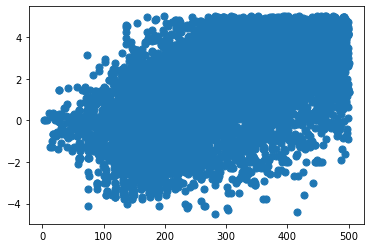

In [ ]:
plt.scatter(aceitoslipinski.loc[:,'molecular_weight'], aceitoslipinski.loc[:,'logP'], s=50, cmap='rainbow')